In [24]:
import os
import glob
import random

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.metrics as metrics

import tensorflow as tf
import keras
from keras import layers, regularizers

import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [11]:
print(' Loading Training Data...')
train_data = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/clothing-dataset/clothing-dataset-small/train", shuffle=True
)

print(' Loading Validation Data...')
val_data= tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/clothing-dataset/clothing-dataset-small/validation', shuffle=True
)

print(' Loading Testing Data...')
test_data= tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/clothing-dataset/clothing-dataset-small/test', shuffle=True
)

 Loading Training Data...
Found 3068 files belonging to 10 classes.
 Loading Validation Data...
Found 341 files belonging to 10 classes.
 Loading Testing Data...
Found 372 files belonging to 10 classes.


## Data Preprocessing

In [3]:
H, W = 128,128

In [9]:
data_preprocessor = keras.Sequential(
    name = "data_preprocessor",
    layers=[
        layers.Resizing(H,W),
        layers.Rescaling(1.0/255)
    ]
)

In [12]:
train_data=train_data.map(lambda x, y: (data_preprocessor(x), y))
val_data=val_data.map(lambda x, y: (data_preprocessor(x), y))
test_data=test_data.map(lambda x, y: (data_preprocessor(x), y))

In [13]:
num_classes = 10

model_1 = keras.Sequential(
    name='CNN-model-1',
    layers=
    [
        layers.Conv2D(
            filters=16,
            kernel_size=3,
            strides=1,
            padding="same",
            activation='relu',
            input_shape=(H, W, 3)
        ),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense( 256, activation="relu"),
        layers.Dense( 10, activation='softmax')
    ]
)

In [14]:
model_1.summary()

Model: "CNN-model-1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      16,777,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,780,490 (64.01 MB)

 Trainable params: 16,780,490 (64.01 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model_1.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [16]:
fit_1 = model_1.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 39s 393ms/step - accuracy: 0.2218 - loss: 6.1458 - val_accuracy: 0.4223 - val_loss: 1.8132
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 36s 376ms/step - accuracy: 0.4895 - loss: 1.5686 - val_accuracy: 0.5337 - val_loss: 1.5064
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 36s 378ms/step - accuracy: 0.6735 - loss: 1.0220 - val_accuracy: 0.5894 - val_loss: 1.3457
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 36s 375ms/step - accuracy: 0.8169 - loss: 0.6368 - val_accuracy: 0.5924 - val_loss: 1.3676
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 388ms/step - accuracy: 0.8988 - loss: 0.3686 - val_accuracy: 0.6158 - val_loss: 1.4014
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 379ms/step - accuracy: 0.9576 - loss: 0.2222 - val_accuracy: 0.6012 - val_loss: 1.5124
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 36s 378ms/step - accuracy: 0.9803 - loss: 0.1348 - val_accuracy: 0.5924 - val_loss: 1.5912
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 381ms/step - accuracy: 0.9946 - loss: 0.0701 - val_accu

In [28]:
def acc_plot(model):
    params = model.params
    history = model.history

    plt.plot(range(0,params['epochs']), history['accuracy'], label='Training', color='r')
    plt.plot(range(0,params['epochs']), history['val_accuracy'], label='Validation', color='b')
    plt.title('Model1 Accuracy Plot', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Epoch', fontsize=12)
    plt.legend()

    plt.show()

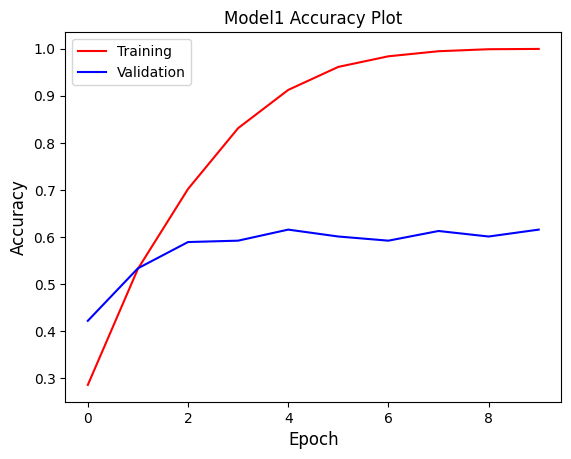

In [29]:
acc_plot(fit_1)

In [30]:
y_pred = model_1.predict(test_data)
y_pred

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


array([[3.4308222e-01, 4.5835209e-06, 3.0999625e-04, ..., 1.9456049e-06,
        5.1586867e-06, 6.5341437e-01],
       [7.1982024e-03, 4.7829816e-01, 9.9396668e-02, ..., 1.7439863e-01,
        2.0421696e-01, 4.9732742e-03],
       [1.5823565e-02, 1.2960416e-03, 5.1690161e-01, ..., 2.2765398e-02,
        1.3709157e-02, 5.8530409e-02],
       ...,
       [8.6484859e-03, 8.8368669e-02, 3.6319587e-01, ..., 9.4248243e-03,
        1.0721578e-02, 3.7745914e-01],
       [5.2411419e-06, 9.2052128e-03, 2.9780308e-04, ..., 9.8877639e-01,
        6.3478091e-04, 9.7718123e-07],
       [4.3111053e-04, 2.4308249e-01, 6.5464652e-01, ..., 1.1102414e-02,
        7.6854536e-03, 4.4673138e-06]], dtype=float32)

In [32]:
# get list of predicted classes by taking argmax of the probabilities(y_pred)
predicted_categories = tf.argmax(y_pred, axis=1)

# create list of all "y"s labels, by iterating over test dataset
true_categories = tf.concat([y for x, y in test_data], axis=0)

# calculate accuracy
test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
print(f'Test Accuracy: {test_acc}')

Test Accuracy: 10.483870967741936


In [35]:
num_classes = 10
hidden_size = 256

model_2 = keras.Sequential(
        name="model1",
        layers=[

            layers.Conv2D(filters=16, kernel_size=3, padding="same", activation='relu', input_shape=(H, W, 3)),
            layers.MaxPooling2D(),

            layers.Conv2D(filters=32, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(),

            layers.Conv2D(filters=64, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(),

            layers.Conv2D(filters=128, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(),

            layers.Conv2D(filters=256, kernel_size=3, padding="same", activation='relu'),
            layers.GlobalAveragePooling2D(),

            layers.Dense(units=hidden_size, activation='relu'),
            layers.Dense(units=num_classes, activation='softmax')
        ]
    )